In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pysal as ps
import scipy.spatial as spatial
#from simpledbf import Dbf5 #needed to read dbf files in pre-2015 FARS data
from dbfread import DBF
%matplotlib inline

Read in FARS data from csv.  Data prior to 2015 is in sas or dbf format, so a differnt method will need to be used  Accident file contains information about the crashes at a per crash level.  

In [13]:
accident_15 = pd.DataFrame.from_csv('FARS2015NationalCSV/accident.csv', index_col=None)
accident_15['YEAR'] = 2015 #add column to specify year, needed when compling multiyear dataset
#accident_15['YEAR'].head()

FARS data by person, which is needed to get driver demographic data, like age.  This table can be combined with accident using the STATE and ST_CASE columns

In [9]:
person_15 = pd.DataFrame.from_csv('FARS2015NationalCSV/person.csv', index_col=None)
person_15['YEAR'] = 2015 #add column to specify year, needed when compling multiyear dataset
#person_15.head()

FARS data by accident

In [8]:
vehicle_15 = pd.DataFrame.from_csv('FARS2015NationalCSV/vehicle.csv', index_col=None, encoding="latin-1")
vehicle_15['YEAR'] = 2015 #add column to specify year, needed when compling multiyear dataset
#vehicle_15.head()

## Pre-2015 data

In [34]:
dbf_link = 'pre_2015_fars/FARS_2014/accident.dbf'
dbf = ps.open(dbf_link)
d = {col: dbf.by_col(col) for col in dbf.header}
df = pd.DataFrame(d)
df.head()

,ARR_HOUR,ARR_MIN,CF1,CF2,CF3,CITY,COUNTY,DAY,DAY_WEEK,DRUNK_DR,...,TWAY_ID,TWAY_ID2,TYP_INT,VE_FORMS,VE_TOTAL,WEATHER,WEATHER1,WEATHER2,WRK_ZONE,YEAR
0,9.0,NaN,9.0,0.0,0.0,1.0,NaN,0.0,4,1,...,4CR-67,,1.0,1.0,1.0,0.0,2.0,1.0,1,None
1,NaN,NaN,9.0,0.0,0.0,9.0,NaN,0.0,4,1,...,4CR-26,,1.0,1.0,2.0,0.0,1.0,1.0,1,None
2,9.0,NaN,9.0,0.0,0.0,NaN,NaN,0.0,4,2,...,2US-SR 6,VERTERAN'S MEMORIAL PKWY,2.0,2.0,3.0,0.0,3.0,1.0,2,None
3,9.0,NaN,9.0,0.0,0.0,NaN,NaN,5.0,4,1,...,2US-SR 38,,1.0,3.0,4.0,0.0,1.0,2.0,1,None
4,NaN,NaN,8.0,0.0,0.0,3.0,NaN,0.0,4,1,...,4CR-719,,1.0,1.0,5.0,0.0,1.0,1.0,1,None


In [59]:
dbf = Dbf5('pre_2015_fars/FARS_2014/accident.dbf')
#dbf.to_csv('test.csv')
dbf


In [61]:
table = DBF('pre_2015_fars/FARS_2014/accident.dbf', load=True)

test = pd.DataFrame(list(table))

test.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,2,2,71,...,99,1,35,99,99,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,59,...,99,13,50,99,99,0,0,0,1,1
2,1,10003,2,2,0,0,0,7,7,125,...,99,3,10,99,99,0,0,0,2,0
3,1,10004,3,3,0,0,0,5,5,121,...,99,9,15,99,99,0,0,0,1,0
4,1,10005,1,1,0,0,0,1,1,43,...,99,12,45,88,88,0,0,0,1,0


In [43]:
'''
Arguments
---------
dbfile  : DBF file - Input to be imported
upper   : Condition - If true, make column heads upper case
'''
def dbf2DF(dbfile, upper=True): #Reads in DBF files and returns Pandas DF
    db = DBF(dbfile, load=True) #Pysal to open DBF
    d = {col: db.by_col(col) for col in db.header} #Convert dbf to dictionary
    #pandasDF = pd.DataFrame(db[:]) #Convert to Pandas DF
    pandasDF = pd.DataFrame(d) #Convert to Pandas DF
    if upper == True: #Make columns uppercase if wanted 
        pandasDF.columns = map(str.upper, db.header) 
    db.close() 
    return pandasDF

In [44]:
accident_14 = dbf2DF('pre_2015_fars/FARS_2014/accident.dbf')

accident_14.head(20)

TypeError: 'DBFHeader' object is not iterable

In [26]:
'''
Arguments
---------
dbfile  : DBF file - Input to be imported
upper   : Condition - If true, make column heads upper case
'''
def dbf2DF(dbfile, upper=True): #Reads in DBF files and returns Pandas DF
    db = ps.open(dbfile) #Pysal to open DBF
    d = {col: db.by_col(col) for col in db.header} #Convert dbf to dictionary
    #pandasDF = pd.DataFrame(db[:]) #Convert to Pandas DF
    pandasDF = pd.DataFrame(d) #Convert to Pandas DF
    if upper == True: #Make columns uppercase if wanted 
        pandasDF.columns = map(str.upper, db.header) 
    db.close() 
    return pandasDF

2014 data, dbf files

In [28]:
accident_14 = dbf2DF('pre_2015_fars/FARS_2014/accident.dbf')

accident_14.head(20)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,9.0,NaN,9.0,0.0,0.0,1.0,NaN,0.0,4,1,...,4CR-67,,1.0,1.0,1.0,0.0,2.0,1.0,1,None
1,NaN,NaN,9.0,0.0,0.0,9.0,NaN,0.0,4,1,...,4CR-26,,1.0,1.0,2.0,0.0,1.0,1.0,1,None
2,9.0,NaN,9.0,0.0,0.0,NaN,NaN,0.0,4,2,...,2US-SR 6,VERTERAN'S MEMORIAL PKWY,2.0,2.0,3.0,0.0,3.0,1.0,2,None
3,9.0,NaN,9.0,0.0,0.0,NaN,NaN,5.0,4,1,...,2US-SR 38,,1.0,3.0,4.0,0.0,1.0,2.0,1,None
4,NaN,NaN,8.0,0.0,0.0,3.0,NaN,0.0,4,1,...,4CR-719,,1.0,1.0,5.0,0.0,1.0,1.0,1,None
5,9.0,NaN,8.0,0.0,0.0,5.0,NaN,0.0,4,1,...,4CR-23,,1.0,1.0,6.0,0.0,2.0,1.0,1,None
6,NaN,NaN,8.0,0.0,0.0,NaN,NaN,0.0,4,1,...,6DUVAL ST,,1.0,3.0,7.0,NaN,NaN,0.0,1,None
7,9.0,NaN,9.0,0.0,0.0,3.0,NaN,0.0,4,1,...,1I-65,,1.0,2.0,8.0,0.0,4.0,1.0,1,None
8,NaN,NaN,8.0,0.0,0.0,NaN,NaN,0.0,4,1,...,2US-SR 78,,1.0,3.0,9.0,0.0,1.0,1.0,1,None
9,NaN,8.0,9.0,0.0,0.0,NaN,NaN,0.0,4,2,...,6ALABAMA RIVER PARKWAY,,1.0,2.0,0.0,0.0,3.0,1.0,1,None


## Import census data, 2011-2015

In [12]:
census = pd.DataFrame.from_csv('census_data/cc-est2015-subset.csv', index_col=None, encoding = 'utf-8')
census = census[census['YEAR'] >= 4] #filter out desired census years, 2011:2015
#convert coded census years to actual years, 4=2011; 5=2012; 6=2013; 7=2014; 8=2015
census['YEAR'] = census['YEAR'] + 2007
census.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE
57,50,1,1,Alabama,Autauga County,2011,0,55253,26999,28254
58,50,1,1,Alabama,Autauga County,2011,1,3581,1864,1717
59,50,1,1,Alabama,Autauga County,2011,2,3940,1954,1986
60,50,1,1,Alabama,Autauga County,2011,3,4355,2223,2132
61,50,1,1,Alabama,Autauga County,2011,4,3954,2033,1921


## Exploratory analysis

Q1: Number of accidents per state

(array([ 11.,  11.,   4.,   6.,   5.,   6.,   3.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([   23.  ,   178.05,   333.1 ,   488.15,   643.2 ,   798.25,
          953.3 ,  1108.35,  1263.4 ,  1418.45,  1573.5 ,  1728.55,
         1883.6 ,  2038.65,  2193.7 ,  2348.75,  2503.8 ,  2658.85,
         2813.9 ,  2968.95,  3124.  ]),
 <a list of 20 Patch objects>)

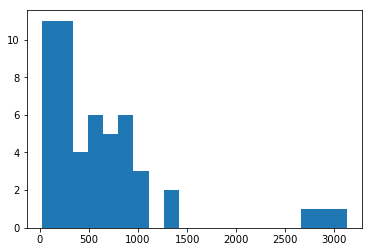

In [16]:
a = accident
acc_state = a.groupby(a.STATE).size().to_frame().reset_index()
acc_state.columns = ['STATE', 'ACC']
#print(acc_state)
plt.hist(acc_state.ACC, normed=False, bins=20)

Want to adjust by state population to get accidents per capita

In [7]:
#summarize population by state)
c = census
#filter for year == 8, which is 2015 estimate(most recent and corresponds with accident data)
#and age group 0, which is total
c15 = c[(c['YEAR'] == 8) & (c['AGEGRP'] == 0)]
pop_state = c15.groupby(c15.STATE)[['TOT_POP']].sum().reset_index()
pop_state.head()

,STATE,TOT_POP
0,1,4858979
1,2,738432
2,4,6828065
3,5,2978204
4,6,39144818


In [8]:
#combine with accident data 
acc_pop =  pd.merge(acc_state, pop_state, how='left', on=['STATE'])
acc_pop.head()


,STATE,ACC,TOT_POP
0,1,783,4858979
1,2,60,738432
2,4,810,6828065
3,5,472,2978204
4,6,2925,39144818


(array([ 3.,  0.,  3.,  3.,  5.,  5.,  4.,  3.,  4.,  3.,  8.,  1.,  2.,
         3.,  0.,  0.,  1.,  1.,  1.,  1.]),
 array([  34.21458196,   43.50866939,   52.80275681,   62.09684424,
          71.39093167,   80.6850191 ,   89.97910653,   99.27319396,
         108.56728139,  117.86136882,  127.15545625,  136.44954367,
         145.7436311 ,  155.03771853,  164.33180596,  173.62589339,
         182.91998082,  192.21406825,  201.50815568,  210.8022431 ,
         220.09633053]),
 <a list of 20 Patch objects>)

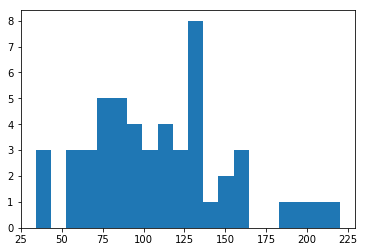

In [17]:
#make population in millions column
acc_pop = acc_pop.assign(POP_MIL = pd.Series(acc_pop.TOT_POP / 1000000).values)
#make accidents per million column
acc_pop = acc_pop.assign(ACC_MIL = pd.Series(acc_pop.ACC / acc_pop.POP_MIL).values)
#print(acc_pop)

plt.hist(acc_pop.ACC_MIL, normed=False, bins=20)

## Are crashes more likely to occur on certain days of the week or at certain times?

(array([ 1252.,  1200.,  1188.,   936.,   741.,   988.,  1185.,  1131.,
          906.,   948.,  1019.,  1117.,  1205.,  1376.,  1489.,  1669.,
         1624.,  1826.,  1878.,  1758.,  1836.,  1792.,  1538.,  1315.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

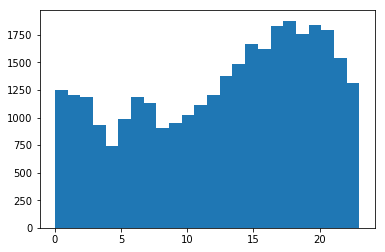

In [29]:
hours = a.HOUR
hours = hours[hours < 25]
plt.hist(hours, normed=False, bins=24)

(array([ 5237.,  3991.,  3950.,  4128.,  4406.,  4857.,  5597.]),
 array([ 1.        ,  1.85714286,  2.71428571,  3.57142857,  4.42857143,
         5.28571429,  6.14285714,  7.        ]),
 <a list of 7 Patch objects>)

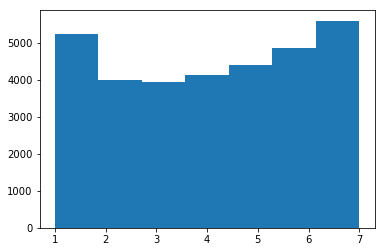

In [31]:
plt.hist(a.DAY_WEEK, normed=False, bins=7)
#1 is Sunday

## Q2: accidents by age group

In [12]:
p = person
p.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0


<Container object of 95 artists>

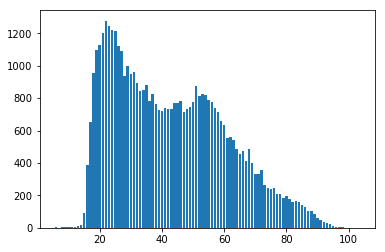

In [26]:
#all people involved
p_age = p.groupby(p.AGE).size()

#only drivers (PER_TYP == 1)
p_drive = p[p['PER_TYP'] == 1]

p_d_age = p_drive.groupby(p_drive.AGE).size().reset_index()
p_d_age.columns = ['AGE', 'ACC']
p_d_age = p_d_age[p_d_age['AGE'] <= 105] #remove missing (998 and 999)
p_d_age
plt.bar(p_d_age.AGE,p_d_age.ACC)

## Geographic distribution of crashes

In [ ]:
lat_lon = a[['LATITUDE', "LONGITUD"]]
lat_lon = lat_lon[lat_lon['LONGITUD'] < 360]
lat_lon.head()
plt.plot(lat_lon.LONGITUD, lat_lon.LATITUDE, "o")

In [ ]:
#want to convert to density

ll_array = lat_lon.as_matrix()

tree = spatial.KDTree(np.array(ll_array))
radius = 0.5

neighbors = tree.query_ball_tree(tree, radius)
print(neighbors)


In [61]:
#EXAMPLE
#points = np.array([(1, 2), (3, 4), (4, 5), (100,100)])
#tree = spatial.KDTree(np.array(points))
#radius = 3.0

#neighbors = tree.query_ball_tree(tree, radius)
#print(neighbors)

[[0, 1], [0, 1, 2], [1, 2], [3]]


0        34
1        35
2        32
3        31
4        31
5        33
6        35
7        33
8        33
9        35
10       35
11       34
12       33
13       32
14       34
15       33
16       31
17       33
18       33
19       33
20       34
21       34
22       32
23       32
24       33
25       33
26       30
27       32
28       31
29       33
         ..
32136    43
32137    44
32138    43
32139    43
32140    41
32141    43
32142    41
32143    42
32144    43
32145    42
32146    44
32147    43
32148    43
32149    44
32150    43
32151    43
32152    43
32153    42
32154    43
32155    41
32156    43
32157    42
32158    43
32159    45
32160    42
32161    43
32162    41
32163    41
32164    42
32165    45
Name: LATITUDE, dtype: int64